In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
def candidatePoolCellAnalysis(candidatePoolCell, tau, seedLoc, emergenceday):
    replicate=candidatePoolCell['repli'].unique()
    iterPerReplicate=candidatePoolCell['iterRepli'].max()
    candidatePoolCell.dayd -=candidatePoolCell.emergenceDay
    #day=len(candidatePoolCell['dayd'].unique().tolist())
    day=candidatePoolCell['dayd'].unique()
    Bp=candidatePoolCell['Bp'].unique()
    print(Bp)
    cPool=[]
    for i in replicate:
        for j in day:
            for k in Bp:
                cPForReplicateDay=candidatePoolCell.loc[(candidatePoolCell['repli']==i)&(candidatePoolCell['dayd']==j)&(candidatePoolCell['Bp']==k)]
                cPool.append([i,j, k, cPForReplicateDay['UFullPool'].mean(), cPForReplicateDay['UVariant2'].mean(), cPForReplicateDay['UFullPool_sym'].mean(), cPForReplicateDay['UFullPool_asym'].mean()])
    #MfIR is the abbreviation of the mean from iterPerReplicate
    cPooldf = pd.DataFrame(cPool, columns=['iter', 'dayd','Bp', 'UFullPool_MfIR', 'UVariant2_MfIR', 'UFullPool_sym_MfIR', 'UFullPool_asym_MfIR'])
    print(cPooldf)
    cPooldf1=cPooldf.loc[cPooldf['Bp']==10000]
    UFullPool_MfIR_1=cPooldf1.pivot(index=['iter'], columns='dayd', values='UFullPool_MfIR')
    UVariant2_MfIR_1=cPooldf1.pivot(index=['iter'], columns='dayd', values='UVariant2_MfIR')
    UFullPool_sym_MfIR_1=cPooldf1.pivot(index=['iter'], columns='dayd', values='UFullPool_sym_MfIR')
    UFullPool_asym_MfIR_1=cPooldf1.pivot(index=['iter'], columns='dayd', values='UFullPool_asym_MfIR')
    
    cPooldf3=cPooldf.loc[cPooldf['Bp']==30000]
    UFullPool_MfIR_3=cPooldf3.pivot(index=['iter'], columns='dayd', values='UFullPool_MfIR')
    UVariant2_MfIR_3=cPooldf3.pivot(index=['iter'], columns='dayd', values='UVariant2_MfIR')
    UFullPool_sym_MfIR_3=cPooldf3.pivot(index=['iter'], columns='dayd', values='UFullPool_sym_MfIR')
    UFullPool_asym_MfIR_3=cPooldf3.pivot(index=['iter'], columns='dayd', values='UFullPool_asym_MfIR')
    
    
    print(UFullPool_MfIR_1)
    plt.figure();
    plt.semilogy(day, UFullPool_MfIR_1.quantile(0.5, axis=0), "k", marker='o',markevery=15, label='pool_size_Bp10000');
    plt.semilogy(day, UVariant2_MfIR_1.quantile(0.5, axis=0), "g", marker='x',markevery=25, label='variant-2_Bp10000');
    plt.semilogy(day, UFullPool_sym_MfIR_1.quantile(0.5, axis=0), "r",marker='d',markevery=20, label='symp_Bp10000');
    plt.semilogy(day, UFullPool_asym_MfIR_1.quantile(0.5, axis=0), "b",marker='<',markevery=20, label='asymp_Bp10000');
    
    plt.semilogy(day, UFullPool_MfIR_3.quantile(0.5, axis=0), "k", marker='<',markevery=35, label='pool_size_Bp30000');
    plt.semilogy(day, UVariant2_MfIR_3.quantile(0.5, axis=0), "g", marker='d',markevery=25, label='variant-2_Bp30000');
    plt.semilogy(day, UFullPool_sym_MfIR_3.quantile(0.5, axis=0), "r",marker='x',markevery=30, label='symp_Bp30000');
    plt.semilogy(day, UFullPool_asym_MfIR_3.quantile(0.5, axis=0), "b",marker='o',markevery=20, label='asymp_Bp30000');
    plt.legend()
    plt.xlabel("day-emergenceday")
    plt.title("tau="+str(tau)+'seedLoc='+str(seedLoc)+'emergenceday='+str(emergenceday))
    
    
    
    
    

[10000 30000]
      iter  dayd     Bp  UFullPool_MfIR  UVariant2_MfIR  UFullPool_sym_MfIR  \
0        1     1  10000            76.1             0.0                76.0   
1        1     1  30000            76.4             0.0                76.0   
2        1     2  10000            67.7             0.0                67.5   
3        1     2  30000            69.2             0.0                68.5   
4        1     3  10000            54.9             0.0                54.6   
...    ...   ...    ...             ...             ...                 ...   
9555    20   237  30000          4637.1           569.2              4547.6   
9556    20   238  10000          4652.1           564.5              4622.9   
9557    20   238  30000          4723.1           574.2              4630.5   
9558    20   239  10000          4721.1           547.4              4691.4   
9559    20   239  30000          4791.5           557.7              4698.0   

      UFullPool_asym_MfIR  
0        

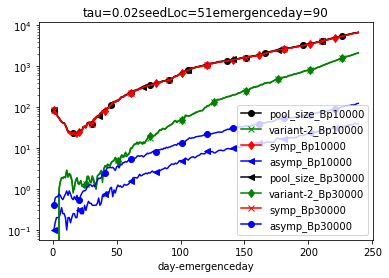

In [14]:
samplingName='randomWithMemoryAdjustExp4CanditatePool_tau_'
f='/project/biocomplexity/biosurveillance/EpiHiper/postProcessing/combineSamplingResult/'+samplingName+'_rep_20.csv'

candidatePool=pd.read_csv(f)
#print(candidatePool)
tau = candidatePool['tau1'].unique()
seedLoc=candidatePool['seedLoc1'].unique()
emergenceDay=candidatePool['emergenceDay'].unique()
combination=[(i, j, k) for i in tau for j in seedLoc for k in emergenceDay]
for i in combination:
    #print(i)
    candidatePoolCell=candidatePool.loc[(candidatePool['tau1']==i[0])&(candidatePool['seedLoc1']==i[1])&(candidatePool['emergenceDay']==i[2])&(candidatePool['Bg']==15)].copy()
    
    candidatePoolCellAnalysis(candidatePoolCell, i[0], i[1], i[2])
    break
    
    
  
    

In [38]:
arr = np.array(UFullPool_asym_MfIR_p)
ss=np.sort(arr, axis=0)
#np.median(arr, axis=0)


In [39]:
#UFullPool_asym_MfIR_p.quantile(0.5, axis=0)

NameError: name 'shape' is not defined

In [120]:
UFullPool_MfIR_p.quantile(0.5, axis=0)

dayd
1        87.225
2        74.925
3        67.325
4        59.650
5        54.650
         ...   
235    6410.250
236    6487.475
237    6575.250
238    6692.350
239    6773.825
Name: 0.5, Length: 239, dtype: float64